02/24/2022

Useful References:
1. Linear Regression: http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm#:~:text=Linear%20regression%20attempts%20to%20model,linear%20equation%20to%20observed%20data.&text=A%20linear%20regression%20line%20has,Y%20is%20the%20dependent%20variable.
2. sklearn Linear Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 
3. Why I used the Standard Deviation vs sum: https://quantique.u-strasbg.fr/lib/exe/fetch.php?media=fr:pageperso:ef:heisenberg_inequalities_with_solution.pdf 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

LR = Linear Ridge Regression \\
LL = Linear Lasso Regression

In [ ]:
def LR(x,y,w,b,alpha):
  L=w*x+b-y
  L=alpha*L*L
  return L

def LL(x,y,w,b,alpha):
  L=alpha*np.abs(w*x+b-y)
  return L

def LR_3D(x,y,w,b,alpha):
  LR_3D_array=np.empty([0,3])
  for i in range(len(w)):
    for j in range(len(b)):
      for k in range(len(x)):
        LR_value=LR(x,y,w[i],b[j],alpha)[k]
        LR_3D_array =np.concatenate((LR_3D_array,np.array([[w[i],b[j],LR_value]]))) # Time Heavy
  return LR_3D_array


def LL_3D(x,y,w,b,alpha):
  LL_3D_array=np.empty([0,3])
  for i in range(len(w)):
    for j in range(len(b)):
      for k in range(len(x)):
        LL_value=LL(x,y,w[i],b[j],alpha)[k]
        LL_3D_array =np.concatenate((LL_3D_array,np.array([[w[i],b[j],LL_value]])))  # Time Heavy
  return LL_3D_array

def LR_3D_Sum(x,y,w,b,alpha):
  loss_array=np.empty([0,3])
  mean=0
  meansq=0
  ratio=2
  penalty1=10
  penalty2=ratio*penalty1
  cutoff=1.95
  cutoff2=ratio*cutoff
  for i in range(len(w)):
    for j in range(len(b)):
      for k in range(len(x)):
        LR_value=LR(x,y,w[i],b[j],alpha)[k]
        if LR_value > cutoff2:
          mean+=LR_value+penalty2
          meansq+=(LR_value+penalty2)*(LR_value+penalty2)
        if LR_value > cutoff and LR_value<=cutoff2:
          mean+=LR_value+penalty1
          meansq+=(LR_value+penalty1)*(LR_value+penalty1)
        elif LR_value <= cutoff:
          mean+=LR_value
          meansq+=LR_value*LR_value
      mean=mean/len(x)
      meansq=meansq/len(x)
      sd=np.sqrt(np.abs(meansq-mean*mean))
      loss_array = np.concatenate((loss_array,np.array([[w[i],b[j],sd]])))
  sorted_array = loss_array[np.argsort(loss_array[:,2])]
  return sorted_array


def LL_3D_Sum(x,y,w,b,alpha):
  loss_array=np.empty([0,3])
  mean=0
  meansq=0
  ratio=2
  penalty1=10
  penalty2=ratio*penalty1
  cutoff=1.95
  cutoff2=ratio*cutoff
  for i in range(len(w)):
    for j in range(len(b)):
      for k in range(len(x)):
        LR_value=LR(x,y,w[i],b[j],alpha)[k]
        if LR_value > cutoff2:
          mean+=LR_value+penalty2
          meansq+=(LR_value+penalty2)*(LR_value+penalty2)
        if LR_value > cutoff and LR_value<=cutoff2:
          mean+=LR_value+penalty1
          meansq+=(LR_value+penalty1)*(LR_value+penalty1)
        elif LR_value <= cutoff:
          mean+=LR_value
          meansq+=LR_value*LR_value
      mean=mean/len(x)
      meansq=meansq/len(x)
      sd=np.sqrt(np.abs(meansq-mean*mean))
      loss_array = np.concatenate((loss_array,np.array([[w[i],b[j],sd]])))
  sorted_array = loss_array[np.argsort(loss_array[:,2])]
  return sorted_array

def find_mean_slope(x,y):
  mean = 0
  for i in range(len(x)-len(x)//5):
    mean+=(y[i+len(x)//5]-y[i])/(x[i+len(x)//5]-x[i])
  mean=mean/len(x)
  return mean

def find_mean_b(x,y,m):
  mean = 0
  for i in range(len(x)):
    mean+=y[i]-m*x[i]
  mean=mean/len(x)
  return mean

def get_min_LR(x,y,w,b,alpha):
  loss_array=np.empty([0,3])
  mean=0
  meansq=0
  ratio=2
  penalty1=10
  penalty2=ratio*penalty1
  cutoff=1.95
  cutoff2=ratio*cutoff
  for i in range(len(w)):
    for j in range(len(b)):
      for k in range(len(x)):
        LR_value=LR(x,y,w[i],b[j],alpha)[k]
        if LR_value > cutoff2:
          mean+=LR_value+penalty2
          meansq+=(LR_value+penalty2)*(LR_value+penalty2)
        if LR_value > cutoff and LR_value<=cutoff2:
          mean+=LR_value+penalty1
          meansq+=(LR_value+penalty1)*(LR_value+penalty1)
        elif LR_value <= cutoff:
          mean+=LR_value
          meansq+=LR_value*LR_value
      mean=mean/len(x)
      meansq=meansq/len(x)
      sd=np.sqrt(np.abs(meansq-mean*mean))
      loss_array =np.concatenate((loss_array,np.array([[w[i],b[j],sd]])))
  sorted_array = loss_array[np.argsort(loss_array[:,2])]
  return np.array([sorted_array[0,0],sorted_array[0,1]])


def get_min_LL(x,y,w,b,alpha):
  loss_array=np.empty([0,3])
  mean=0
  meansq=0
  ratio=2
  penalty1=10
  penalty2=ratio*penalty1
  cutoff=6
  cutoff2=ratio*cutoff
  for i in range(len(w)):
    for j in range(len(b)):
      for k in range(len(x)):
        LL_value=LL(x,y,w[i],b[j],alpha)[k]
        if LL_value > cutoff2:
          mean+=LL_value+penalty2
          meansq+=(LL_value+penalty2)*(LL_value+penalty2)
        if LL_value > cutoff and LL_value<=cutoff2:
          mean+=LL_value+penalty1
          meansq+=(LL_value+penalty1)*(LL_value+penalty1)
        elif LL_value <= cutoff:
          mean+=LL_value
          meansq+=LL_value*LL_value
      mean=mean/len(x)
      meansq=meansq/len(x)
      sd=np.sqrt(np.abs(meansq-mean*mean))
      loss_array =np.concatenate((loss_array,np.array([[w[i],b[j],sd]])))
  sorted_array = loss_array[np.argsort(loss_array[:,2])]
  return np.array([sorted_array[0,0],sorted_array[0,1]])

In [ ]:
rng = np.random.RandomState(4)

#Set alpha and 
alpha=1
r=10 #spread for data points

# Set Data input
datapoints = 50
x = r * rng.rand(datapoints)
x.sort()
n=len(x)
y = 4 * x - 5 + 5*rng.randn(n)
error = (y-4*x+5)*(y-4*x+5)

In [ ]:
# Approximate Initial Slope and Intercept Values
w0 = find_mean_slope(x,y)
jump = datapoints//10
discreteness = 100
w = np.linspace(w0-jump,w0+jump,discreteness)
b0= find_mean_b(x,y,w0)
newjump = n//7
b = np.linspace(b0-newjump,b0+newjump,discreteness)

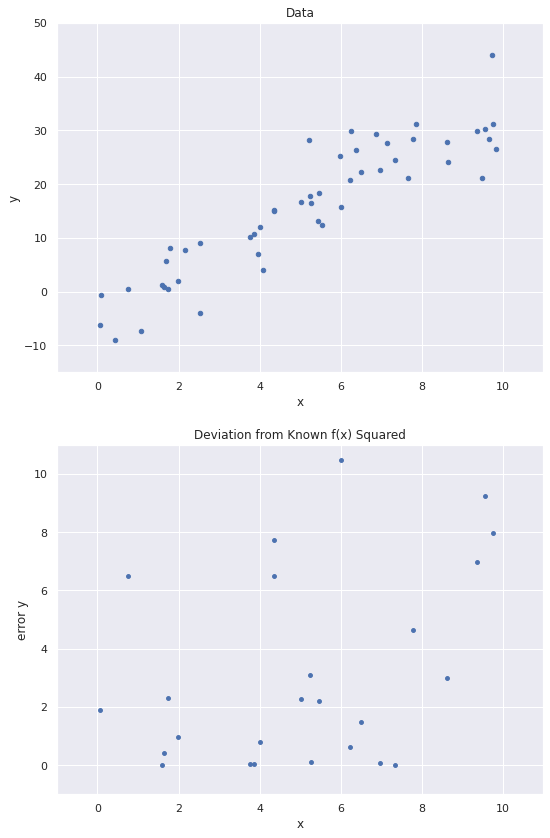

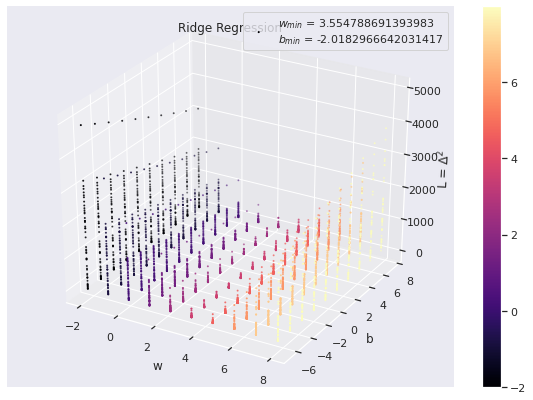

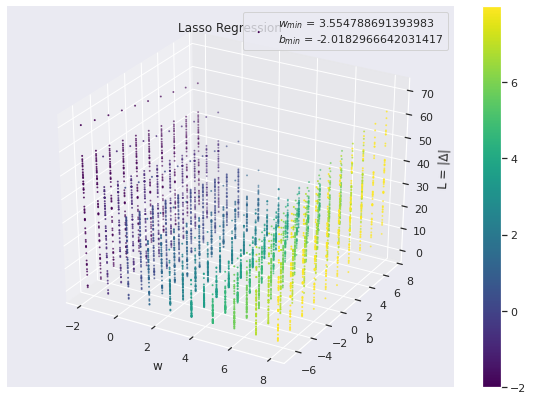

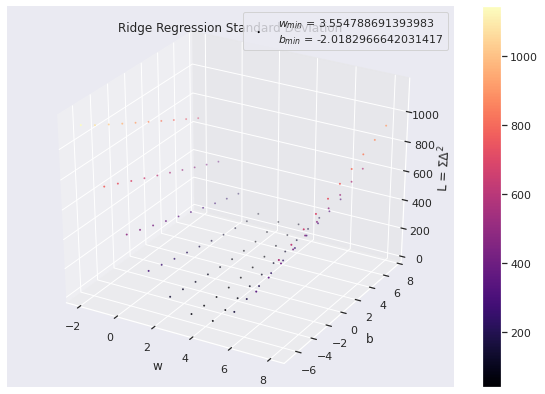

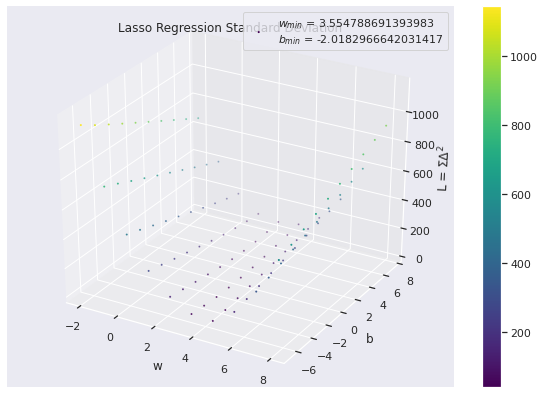

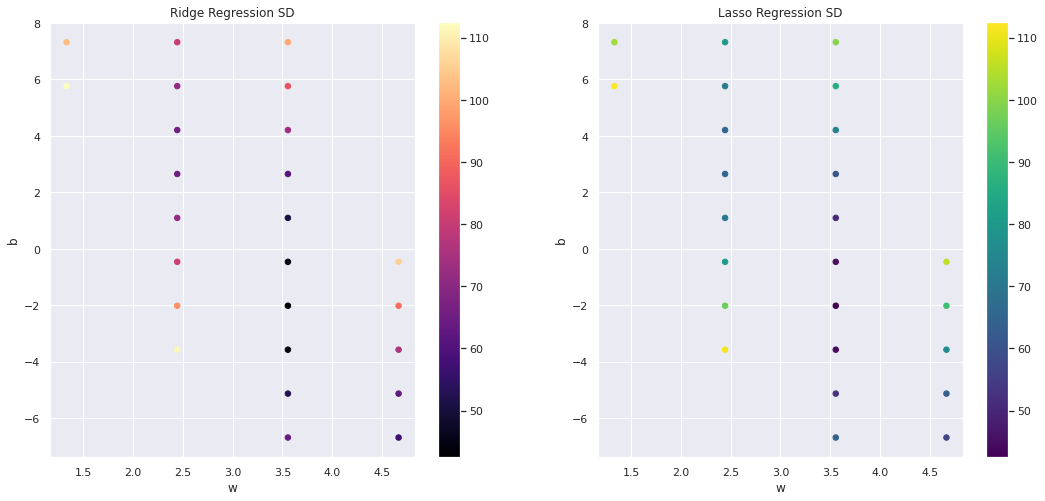

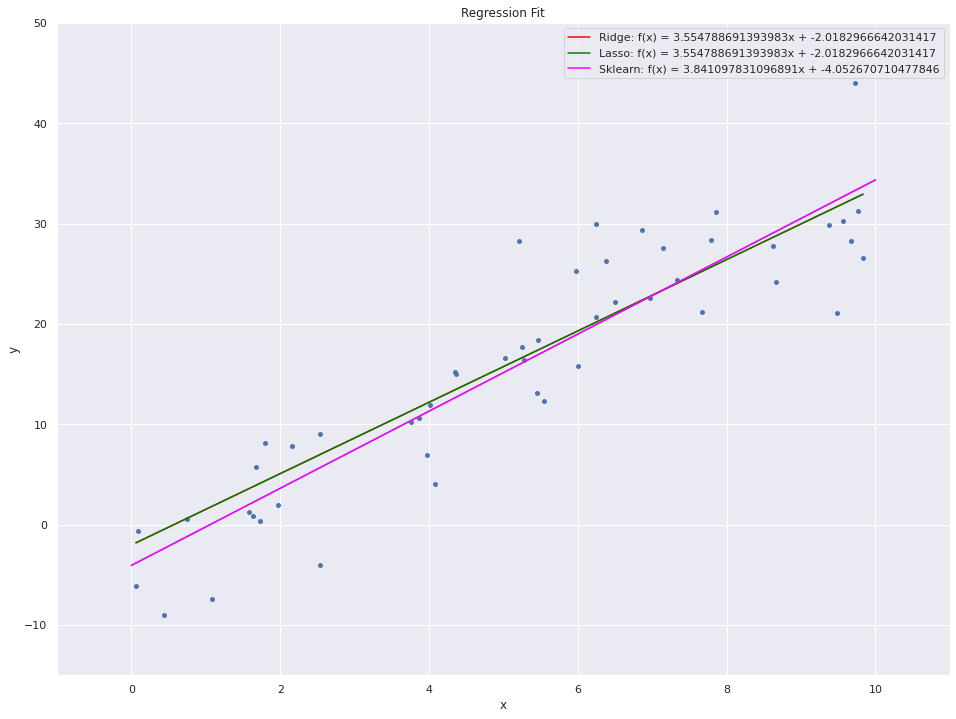

In [ ]:
from matplotlib.projections.polar import PolarTransform
from mpl_toolkits.mplot3d import Axes3D

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,12))

#Set plots layout spacing
fig.tight_layout(pad=2.0)

#Plot Data
ax1.scatter(x,y,marker='o',s=20)
ax1.set(xlim=(-1,r+1),ylim=(-15,50),xlabel='x',ylabel='y',title='Data')

#Plot Deviation from f(x) squared
ax2.scatter(x,error,marker='o',s=15)
ax2.set(xlim=(-1,r+1),ylim=(-1,11),xlabel='x',ylabel='error y',title='Deviation from Known f(x) Squared')
fig.savefig('initial_data.png')

#Calculate w,b that corresponds to Minimum in Loss Function for Ridge Regression
minLR=get_min_LR(x,y,w,b,alpha)
minLRw=minLR[0]
minLRb=minLR[1]


LR_3D_array = LR_3D(x,y,w,b,alpha)

#Plot Loss Function for Ridge Regression
# Each Vertical Line in the Plot represents a fixed w and b value
# which corresponds to a loss function value for each (x,y) point in the
# original plot.
fig2 = plt.figure(figsize = (10, 7))
ax3 = plt.axes(projection ="3d")
xs = LR_3D_array[:,0]
p=ax3.scatter3D(LR_3D_array[:,0],LR_3D_array[:,1],LR_3D_array[:,2],
              label='$w_{min}$ = '+str(minLRw)+'\n'+'$b_{min}$ = '+str(minLRb),s=1,c=xs,cmap=plt.cm.magma)
ax3.set(xlabel='w',ylabel='b',zlabel='L = $\Delta^2$',title='Ridge Regression')
plt.colorbar(p)
ax3.legend()
fig2.savefig('ridge.png')

#Calculate w,b that corresponds to Minimum in Loss Function
minLL=get_min_LL(x,y,w,b,alpha)
minLLw=minLL[0]
minLLb=minLL[1]

LL_3D_array = LL_3D(x,y,w,b,alpha)

#Plot Loss Function for Lasso Regression
# Each Vertical Line in the Plot represents a fixed w and b value
# which corresponds to a loss function value for each (x,y) point in the
# original plot.
fig3 = plt.figure(figsize = (10, 7))
ax4 = plt.axes(projection ="3d")
q=ax4.scatter3D(LL_3D_array[:,0],LL_3D_array[:,1],LL_3D_array[:,2], 
              label='$w_{min}$ = '+str(minLLw)+'\n'+'$b_{min}$ = '+str(minLLb),s=1,c=xs,cmap=plt.cm.viridis)
ax4.set(xlabel='w',ylabel='b',zlabel='L = $|\Delta|$',title='Lasso Regression')
plt.colorbar(q)
ax4.legend()
fig3.savefig('lasso.png')


LR_3D_SD = LR_3D_Sum(x,y,w,b,alpha)
#Plot Loss Function SD for Ridge Regression
# Each point in the Plot represents a fixed w and b value
# which corresponds to a total sum of the loss function over
# all points (x,y) in the original plot. (Really Standard Deviation here)
fig4 = plt.figure(figsize = (10, 7))
ax5 = plt.axes(projection ="3d")
zs = LR_3D_SD[:,2]
p2=ax5.scatter3D(LR_3D_SD[:,0],LR_3D_SD[:,1],LR_3D_SD[:,2],
              label='$w_{min}$ = '+str(minLRw)+'\n'+'$b_{min}$ = '+str(minLRb),s=1,c=zs,cmap=plt.cm.magma)
ax5.set(xlabel='w',ylabel='b',zlabel='L = $\Sigma \Delta^2$',title='Ridge Regression Standard Deviation')
plt.colorbar(p2)
ax5.legend()
fig4.savefig('ridge_SD.png')

LL_3D_SD = LL_3D_Sum(x,y,w,b,alpha)
#Plot Loss Function SD for Lasso Regression
# Each point in the Plot represents a fixed w and b value
# which corresponds to a total sum of the loss function over
# all points (x,y) in the original plot. (Really Standard Deviation here)
fig5 = plt.figure(figsize = (10, 7))
ax6 = plt.axes(projection ="3d")
zs = LL_3D_SD[:,2]
q2=ax6.scatter3D(LL_3D_SD[:,0],LL_3D_SD[:,1],LL_3D_SD[:,2],
              label='$w_{min}$ = '+str(minLLw)+'\n'+'$b_{min}$ = '+str(minLLb),s=1,c=zs,cmap=plt.cm.viridis)
ax6.set(xlabel='w',ylabel='b',zlabel='L = $\Sigma \Delta^2$',title='Lasso Regression Standard Deviation')
plt.colorbar(q2)
ax6.legend()
fig5.savefig('lasso_SD.png')


fig6,(ax7,ax8) = plt.subplots(1,2,figsize=(18,8))
#Plot Loss Function SD for Ridge Regression
# Each point in the Plot represents a fixed w and b value
# which corresponds to a total sum of the loss function over
# all points (x,y) in the original plot. (Really Standard Deviation here)
# 2D Plot of the above basically, where the color bar gives the value
# of the loss function for that  slope/intercept configuration
zs = LR_3D_SD[:25,2]
p3=ax7.scatter(LR_3D_SD[:25,0],LR_3D_SD[:25,1],s=30,c=zs,cmap=plt.cm.magma)
ax7.set(xlabel='w',ylabel='b',title='Ridge Regression SD')
plt.colorbar(p3,ax=ax7)
#Plot Loss Function SD for Lasso Regression
# Each point in the Plot represents a fixed w and b value
# which corresponds to a total sum of the loss function over
# all points (x,y) in the original plot. (Really Standard Deviation here)
# 2D Plot of the above basically, where the color bar gives the value
# of the loss function for that slope/intercept configuration
zs = LL_3D_SD[:25,2]
q3=ax8.scatter(LL_3D_SD[:25,0],LL_3D_SD[:25,1],s=30,c=zs,cmap=plt.cm.viridis)
ax8.set(xlabel='w',ylabel='b',title='Lasso Regression SD')
plt.colorbar(q3,ax=ax8)
fig6.savefig('Lasso_Ridge_SD.png')





########    Plot Linear Regression Best Fit
fig7, ax9 = plt.subplots(1,figsize=(16,12))

#Set plots layout spacing
fig.tight_layout(pad=2.0)

# Plot sklearn Regression Fit
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.plot(xfit, yfit)

#Plot Data Fit for Ridge Regression, Lasso Regression, and Linear Rgression Model
yLR=minLRw*x+minLRb
yLL=minLLw*x+minLLb
ax9.scatter(x,y,marker='o',s=15)
ax9.plot(x,yLR,label='Ridge: f(x) = '+str(minLRw)+'x + '+str(minLRb),color='red')
ax9.plot(x,yLL,label='Lasso: f(x) = '+str(minLLw)+'x + '+str(minLLb),color='green')
ax9.plot(xfit, yfit,label='Sklearn: f(x) = '+str(model.coef_[0])+'x + '+str(model.intercept_),color='magenta')
ax9.set(xlim=(-1,r+1),ylim=(-15,50),xlabel='x',ylabel='y',title='Regression Fit')
ax9.legend()
fig7.savefig('risge_lasso_sklearn.png')







